<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 train-test-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [102]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [103]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

print(sns.__version__)

0.9.0


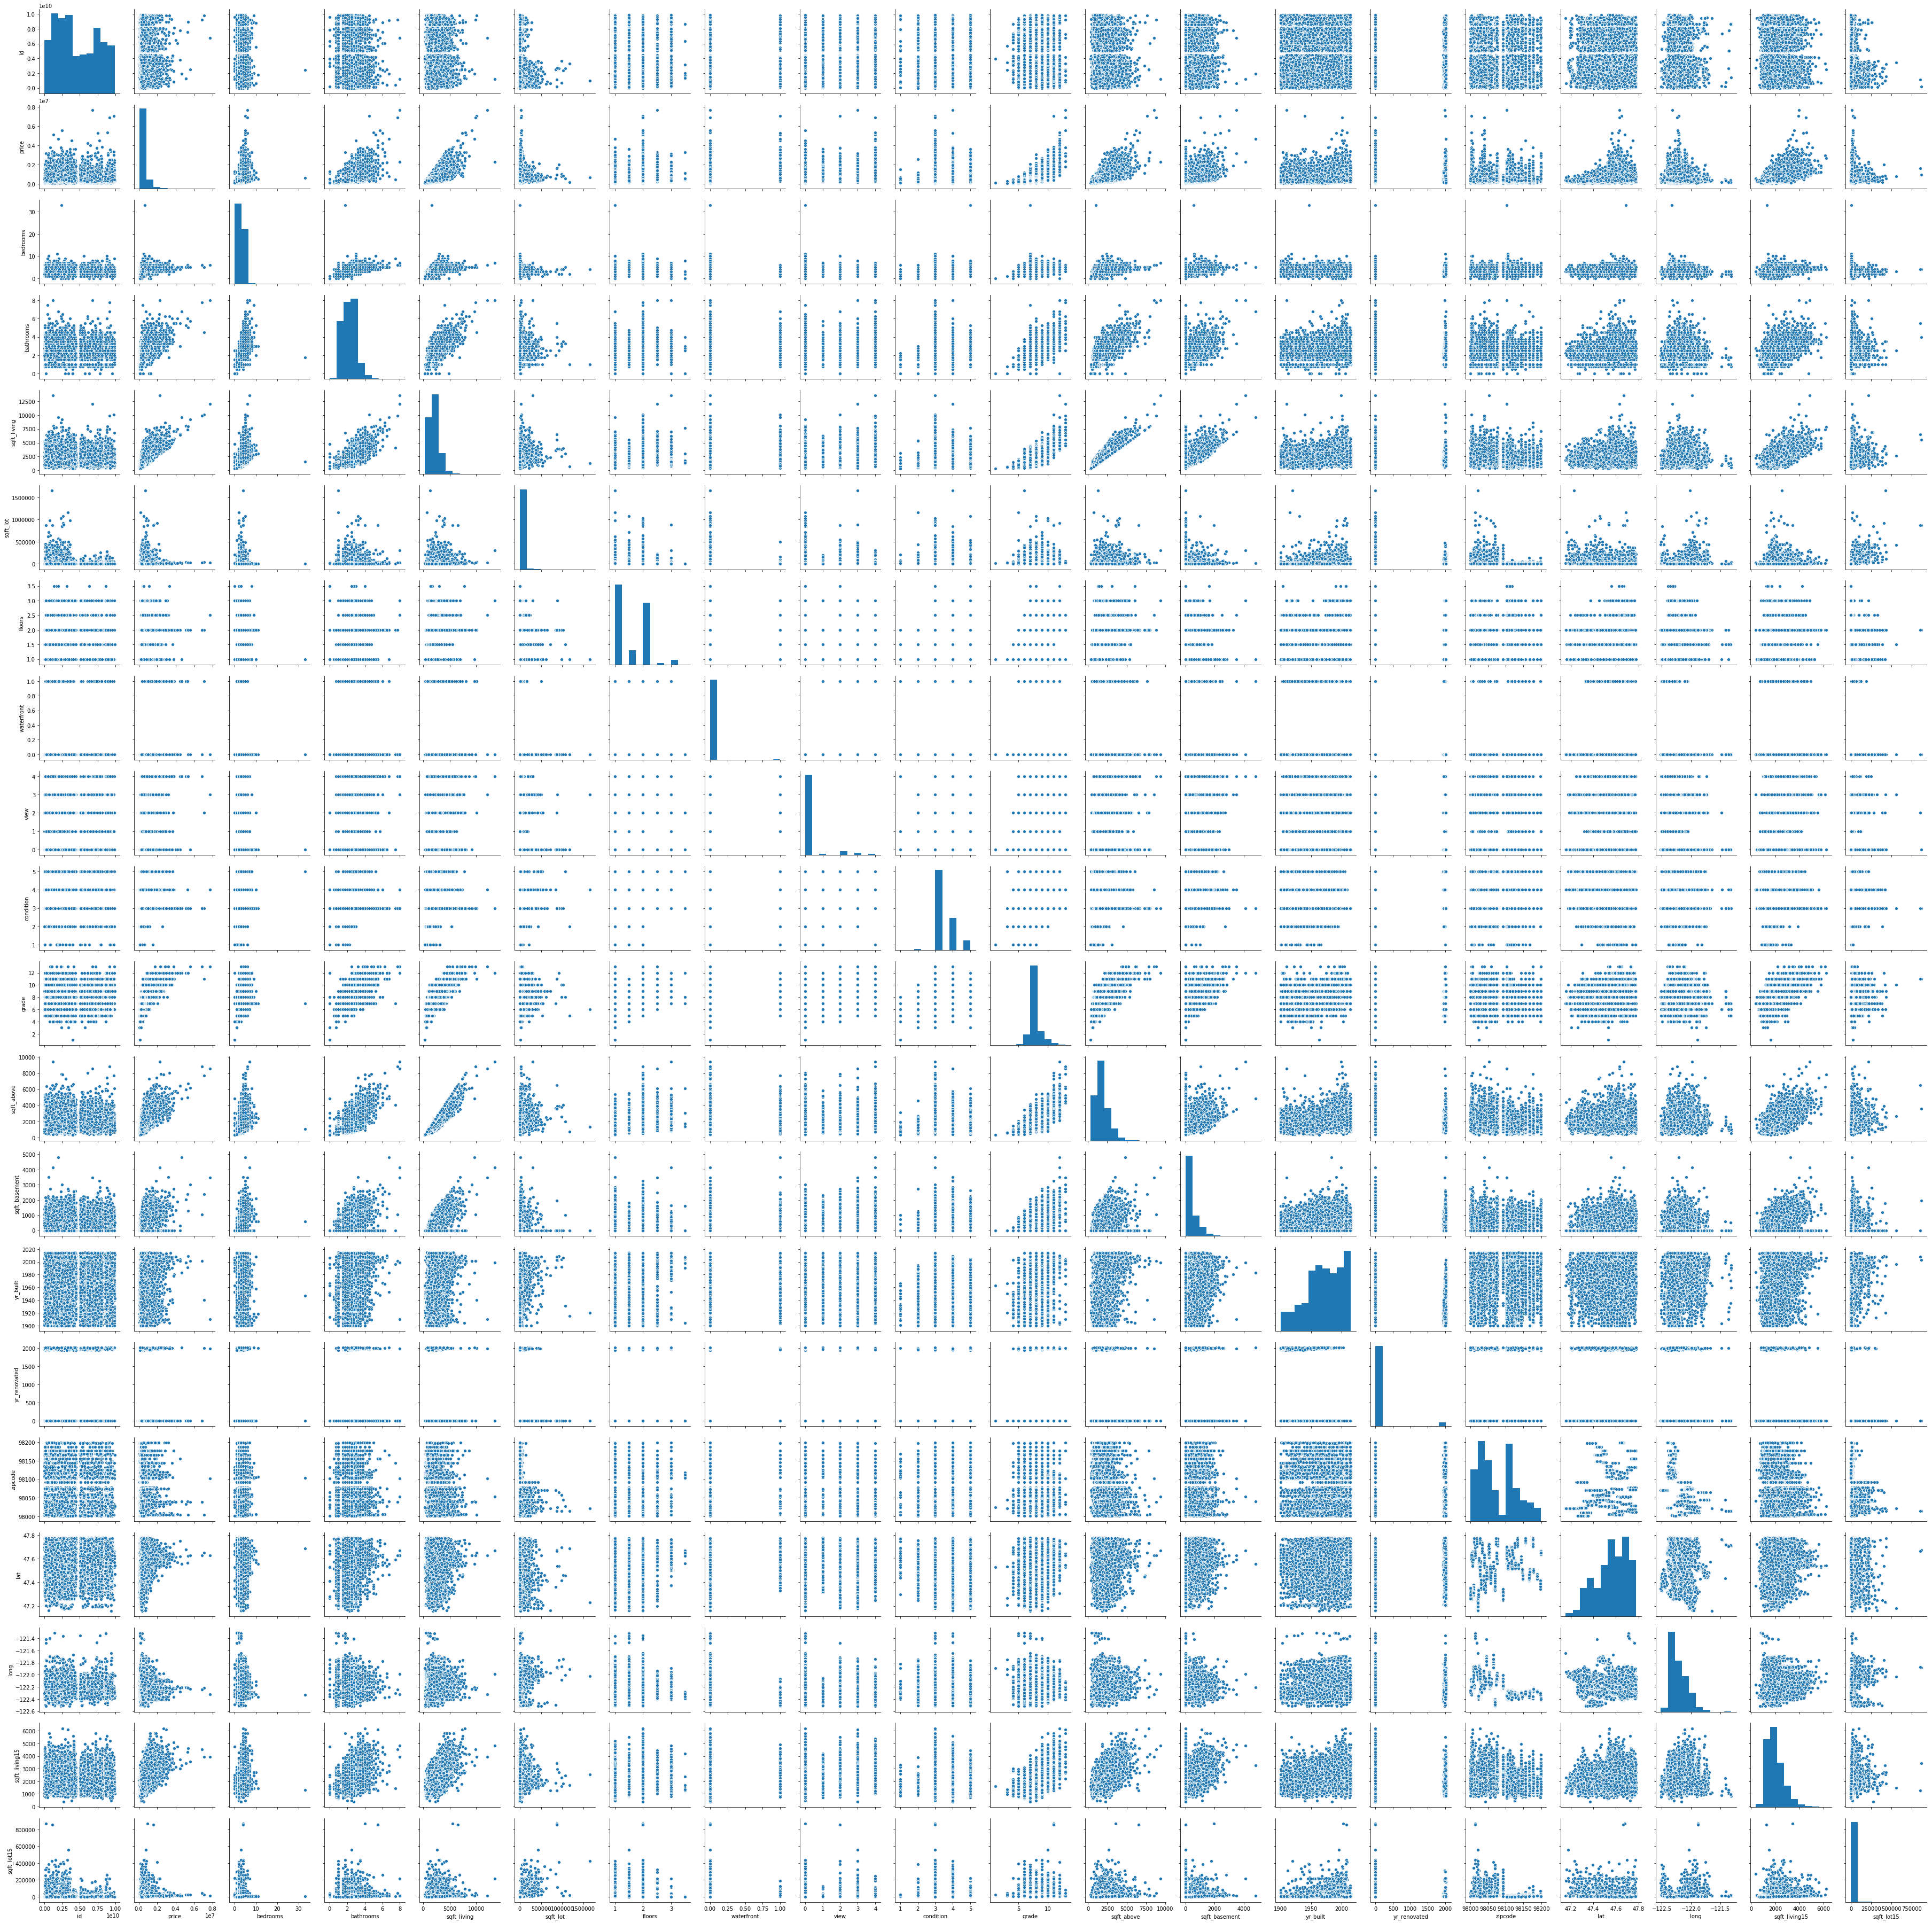

In [105]:
sns.pairplot(df);

### y is the price. The feature that most correlates with it is sqft_above (this will be x for us).

In [122]:
two_col_df = df[['sqft_above', 'price']]
two_col_df.head(5)
x_train, x_test, y_train, y_test = train_test_split(
                                    two_col_df['sqft_above'].values, 
                                    two_col_df['price'].values,
                                    test_size = 0.5)
print('x_train:\n', x_train)
print('x_test:\n', x_test)
print('y_train:\n', y_train)
print('y_test:\n', y_test)

x_train:
 [2650  960 1280 ...  860 2530 1820]
x_test:
 [3370 1050 4280 ... 1410 1460 1580]
y_train:
 [660000. 387000. 200500. ... 300000. 589900. 722500.]
y_test:
 [ 540000.  325000. 1488000. ...  790000.  220650.  285000.]


In [123]:
model = LinearRegression()
reg = model.fit(x_train[:, np.newaxis], y_train)
print('Coefficients:\n', reg.coef_)
print('Intercept:\n', reg.intercept_)

Coefficients:
 [272.02850693]
Intercept:
 53335.66844357218


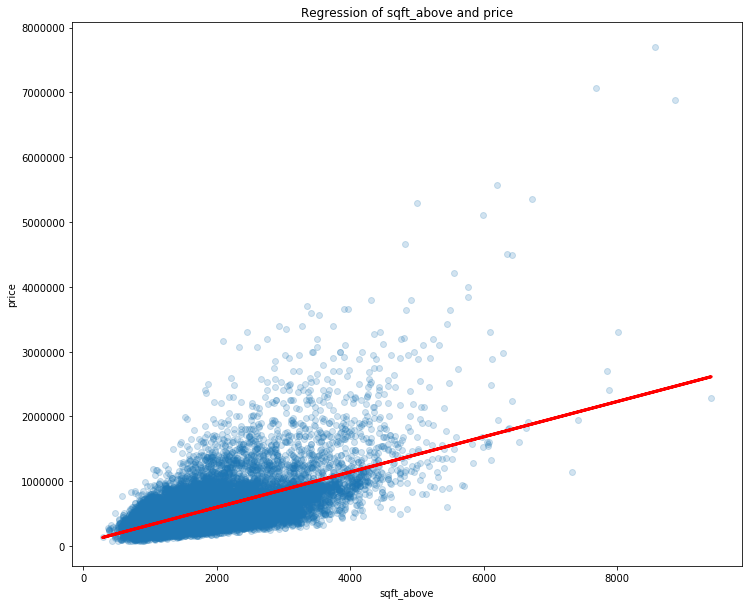

In [125]:
fig = plt.figure(figsize = (12, 10))
plt.scatter(two_col_df['sqft_above'].values, 
            two_col_df['price'].values, alpha = 0.2);
y_hat = [reg.intercept_ + reg.coef_ * x for x in x_train]
plt.plot(x_train, y_hat, color = 'red', linewidth = 3.0)
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('Regression of sqft_above and price');

In [126]:
y_test_predicted = model.predict(x_test[:, np.newaxis])
MSE = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_test_predicted)

print('MSE:', MSE)
print('RMSE:', RMSE)
print('r2:', r2)

MSE: 86606467687.89099
RMSE: 294289.76823513757
r2: 0.3520259120941015


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [127]:
x_train, x_test, y_train, y_test = train_test_split(
                                    df[['sqft_above', 'sqft_living']].values, 
                                    df['price'].values,
                                    test_size = 0.5)
print('x_train:\n', x_train)
print('x_test:\n', x_test)
print('y_train:\n', y_train)
print('y_test:\n', y_test)

x_train:
 [[1530 1530]
 [1420 1420]
 [3090 3090]
 ...
 [2210 3580]
 [2410 2410]
 [1980 3020]]
x_test:
 [[1840 1840]
 [1910 2510]
 [2460 2460]
 ...
 [1330 1330]
 [1340 1940]
 [3010 3010]]
y_train:
 [335000. 410000. 659000. ... 600000. 617950. 975000.]
y_test:
 [317000. 624000. 358000. ... 290000. 432500. 433495.]


In [128]:
model = LinearRegression()
reg = model.fit(x_train, y_train)
print('Coefficients:\n', reg.coef_)
print('Intercept:\n', reg.intercept_)

Coefficients:
 [ -7.13024248 278.05296749]
Intercept:
 -24511.288670281298


In [134]:
np.squeeze(df[['sqft_above']].values)

array([1180, 2170,  770, ..., 1020, 1600, 1020])

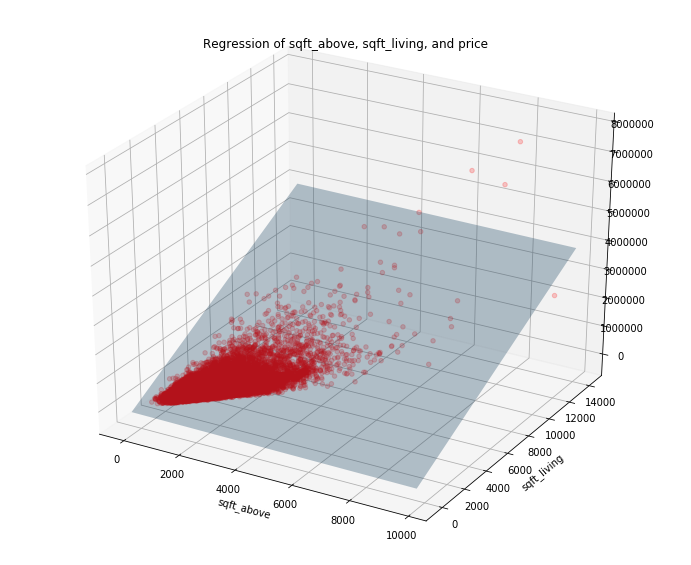

In [136]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(np.squeeze(df['sqft_above']), 
           np.squeeze(df['sqft_living']),
           np.squeeze(df['price']),
           color = 'red',
           alpha = 0.2);

x1, x2 = np.meshgrid(np.array(ax.get_xlim()),
                     np.array(ax.get_ylim()))
y_hat = reg.intercept_ + reg.coef_[0] * x1 + reg.coef_[1] * x2
plt3d = plt.gca(projection='3d')
plt3d.plot_surface(x1, x2, y_hat, alpha = 0.3)
plt.xlabel('sqft_above')
plt.ylabel('sqft_living')
plt.title('Regression of sqft_above, sqft_living, and price');

In [113]:
y_test_predicted = model.predict(x_test)
MSE = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_test_predicted)

print('MSE:', MSE)
print('RMSE:', RMSE)
print('r2:', r2)

MSE: 67724856694.39804
RMSE: 260239.99826006385
r2: 0.48475707859296746


### The coefficient of determination ($R^2$) is larger compared to the single-feature result.  This coefficient shows the closeness of fit of the data to the linear regression model.

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

### Drop the date column, as it's relation to price will keep changing.  We want to find the underlying relation between features and target - so we don't consider features that keep changing.

### We remove the ID column as well, because it is does not have anything to do with the price.

In [114]:
df.drop(['id', 'date'], axis = 1, inplace = True)
df.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [115]:
x_train, x_test, y_train, y_test = train_test_split(
                                    df.drop('price', axis = 1).values,
                                    df['price'].values,
                                    test_size = 0.5)
print('df.drop("price", axis = 1).shape:', df.drop('price', axis = 1).shape)
print('df[price].shape:\n', df['price'].shape)
print('x_train.shape:\n', x_train.shape)
print('x_test.shape:\n', x_test.shape)
print('y_train.shape:\n', y_train.shape)
print('y_test.shape:\n', y_test.shape)

df.drop("price", axis = 1).shape: (21613, 18)
df[price].shape:
 (21613,)
x_train.shape:
 (10806, 18)
x_test.shape:
 (10807, 18)
y_train.shape:
 (10806,)
y_test.shape:
 (10807,)


In [116]:
model = LinearRegression()
reg = model.fit(x_train, y_train)

print('Intercept:', reg.intercept_)
print('Coeff:', reg.coef_)
print('column names:', df.drop('price', axis = 1).columns)

Intercept: 8691867.22487964
Coeff: [-3.73094529e+04  4.04850018e+04  1.07822164e+02  5.86637781e-02
  1.24814481e+04  5.86908059e+05  5.46207275e+04  2.64077464e+04
  9.28717504e+04  6.77305978e+01  4.00915651e+01 -2.60696281e+03
  2.44037690e+01 -5.97118364e+02  5.99215555e+05 -2.11498874e+05
  2.53288096e+01 -2.32900788e-01]
column names: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [117]:
y_test_predicted = model.predict(x_test)
MSE = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_test_predicted)

print('MSE:', MSE)
print('RMSE:', RMSE)
print('r2:', r2)

MSE: 41932540360.06082
RMSE: 204774.3645089903
r2: 0.6978242418983785


### The $R^2$ coefficient of determination is much higher than the one with 2 features.  Adding more features has benefited the prediction a lot.

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


## $R^2$ (Coefficient of Determination)

$R^2$ is calculated using this formula:
$$
R^2 = \frac{\sum_{n = 1}^{N}\left(y_i - \hat{y}\right)^2}{\sum_{n = 1}^{N}\left(y_i - \overline y\right)^2}\\
R^2 = \left({corr(x, y)}\right)^2\;\;\;\;for\;linear\;regression
$$

Ii's value usually goes between 0 and 1.  It represents the amount of variance in the dependent variable for the given independent variable.  The closer to 1 it is, the better this independent variable predicts the dependent variable.  A value of 0 means the independent variable is not related to the dependent variable. Sometimes it can be negative, but in this case there is usually some error.

## Adjusted $R^2$
Adjusted $R^2$ is given by the formula:
$$adj\,R^2 = 1 - \frac{\left(1-R^2\right)\left(N - 1\right)}{N - k + 1}\\
where\,k = number\,of\,independent\,variables$$

Adjusted $R^2$ increases as you add independent variables that increase $R^2$ by a significant amount.  If they don't, adjusted $R^2$ decreases since you are dividing by the number of independent variables.

## Covariance
Covariance is calculated using this formula:
$$cov(x, y) = \frac{\sum_{i = 1}^{N}\left(x_i - \overline x\right)\left(y_i -\overline y\right)}{N}$$

## Sample Standard Deviation
Standard deviation is calculated using:
$$sample\,std dev(y) = \sqrt{\frac{\sum_{n = 1}^{N}\left(y_i - \overline{y}\right)^2}{N-1}}$$

Here we're dividing by N-1.  The population standard deviation requires division by N. Since this is a sample, the sample standard deviation will be larger than the population std dev - so we divide by N-1.

## Correlation (Pearson)
$$corr(x, y) = \frac{cov(x, y)}{std\,dev(x) \cdot std\,dev(y)}$$

Correlation produces a value between -1.0 and +1.0.  Negative values imply negative correlation, positive values imply positive correlation.  The higher the absolute value, the more the absolute correlation.  A correlation of 0 impllies no correlation.